<a href="https://colab.research.google.com/github/sungbeomoppa/-/blob/main/AmImal_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random as r
import tensorflow as tf
import tensorflow_hub as hub
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [ ]:
print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)

# Check for GPU
if tf.config.list_physical_devices("GPU"):
    print("GPU is available")
else:
    print("not available")

TF version: 2.9.2
Hub version: 0.12.0
not available


In [ ]:
import pandas as pd
labels = pd.read_csv("/content/drive/Shareddrives/프로보노/김종원/AnImal/dog-breed-identification/labels.csv")
print(labels.head())

                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
#columns of the labels.csv file
labels.columns

Index(['id', 'breed'], dtype='object')

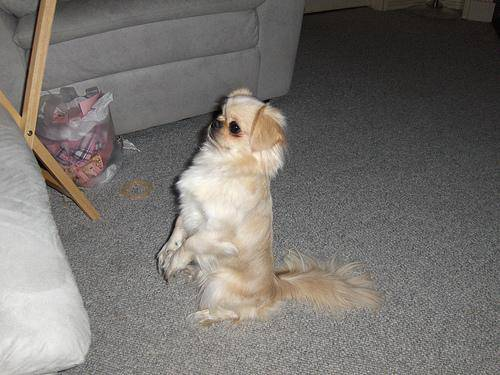

In [ ]:
#displaying an image from the data
from IPython.display import display, Image
Image("/content/drive/Shareddrives/프로보노/김종원/AnImal/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg")

In [ ]:
# Creating pathnames
filenames = []
for name in labels["id"]:
    filenames.append("/content/drive/Shareddrives/프로보노/김종원/AnImal/dog-breed-identification/train/" + name + ".jpg")

# Check the first 10 filenames
filenames[:10]

['/content/drive/Shareddrives/프로보노/김종원/AnImal/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/Shareddrives/프로보노/김종원/AnImal/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/Shareddrives/프로보노/김종원/AnImal/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/Shareddrives/프로보노/김종원/AnImal/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/Shareddrives/프로보노/김종원/AnImal/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/Shareddrives/프로보노/김종원/AnImal/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/Shareddrives/프로보노/김종원/AnImal/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/Shareddrives/프로보노/김종원/AnImal/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21

In [ ]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("/content/drive/Shareddrives/프로보노/김종원/AnImal/dog-breed-identification/train/")) == len(filenames):
  print("There are no missing files.")
else:
  print("Files missing")

There are no missing files.


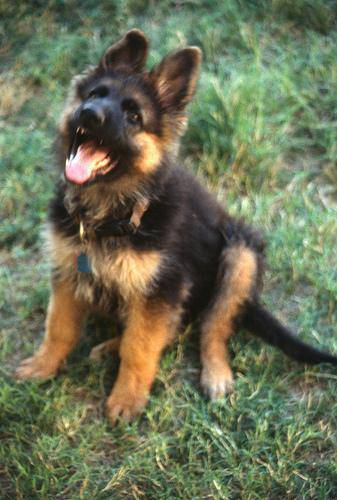

In [ ]:
# Check an image directly from a filepath
Image(filenames[60])

In [ ]:
import numpy as np
label = labels["breed"].to_numpy() # convert labels column to NumPy array
label[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [ ]:
# See if number of labels matches the number of filenames
if len(label) == len(filenames):
  print("Exact number of files")
else:
  print("Some files are missing")

Exact number of files


In [ ]:
# Find the number of unique label
unique = np.unique(label)
len(unique)

120

In [ ]:
# Turn every label into a boolean array
boolean_label = [element == np.array(unique) for element in label]
boolean_label[:1]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False])]

In [ ]:
print(label[0]) # original label
print(np.where(unique == label[0])[0][0]) # index where label occurs in the number array
print(boolean_label[0].argmax()) # index where label occurs in boolean array
print(boolean_label[0].astype(int))

boston_bull
19
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
# Setup X & y variables
x = filenames
y = boolean_label

In [ ]:
# Set number of images to use
NUM_IMAGES = 3000

In [ ]:
# Import train_test_split from Scikit-Learn
from sklearn.model_selection import train_test_split

# Split them into training and validation using NUM_IMAGES 
x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES],
                                                  y[:NUM_IMAGES], 
                                                  test_size=0.2,
                                                  random_state=42)

len(x_train), len(y_train), len(x_val), len(y_val)

(2400, 2400, 600, 600)

In [ ]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[1])
image.shape# read in an image

(375, 500, 3)

In [ ]:
tf.constant(image)[:1]

<tf.Tensor: shape=(1, 500, 3), dtype=uint8, numpy=
array([[[ 51,  34,  27],
        [ 55,  38,  30],
        [ 61,  42,  35],
        ...,
        [128,  92,  60],
        [ 78,  42,  10],
        [168, 132, 100]]], dtype=uint8)>

In [ ]:
# Define image dimension
IMG_SIZE = 224

def process(image_path):
  
  # Read in image file
  image = tf.io.read_file(image_path)

  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)

  # Convert the colour channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)

  # Resize the image to our desired size (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

In [ ]:
# Creating function to return a tuple (image, label)
def image_label(path, label):
 
  image = process(path)
  return image, label

In [ ]:
# defining batch dimensions
BATCH = 32

# Create a function to turn data into batches
def data_batches(x, y=None, batch_size=BATCH , valid_data=False, test_data=False):
    
  # If the data is a test dataset
  if test_data:
    print("Test data batches created")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process).batch(BATCH)
    return data_batch
  
  # If the data if a valid dataset
  elif valid_data:
    
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(image_label).batch(BATCH)
    print("Validation data batches created")
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    
    # Shuffling pathnames and labels
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples
    data = data.map(image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH)
    print("Training data batches created")
  return data_batch

In [ ]:
# Create training and validation data batches
train_data = data_batches(x_train, y_train)
val_data = data_batches(x_val, y_val, valid_data=True)

Training data batches created
Validation data batches created


In [ ]:
# attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [ ]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_images(images, labels):
    
  # Setup the figure
  plt.figure(figsize=(20, 20))
    
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
        
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")

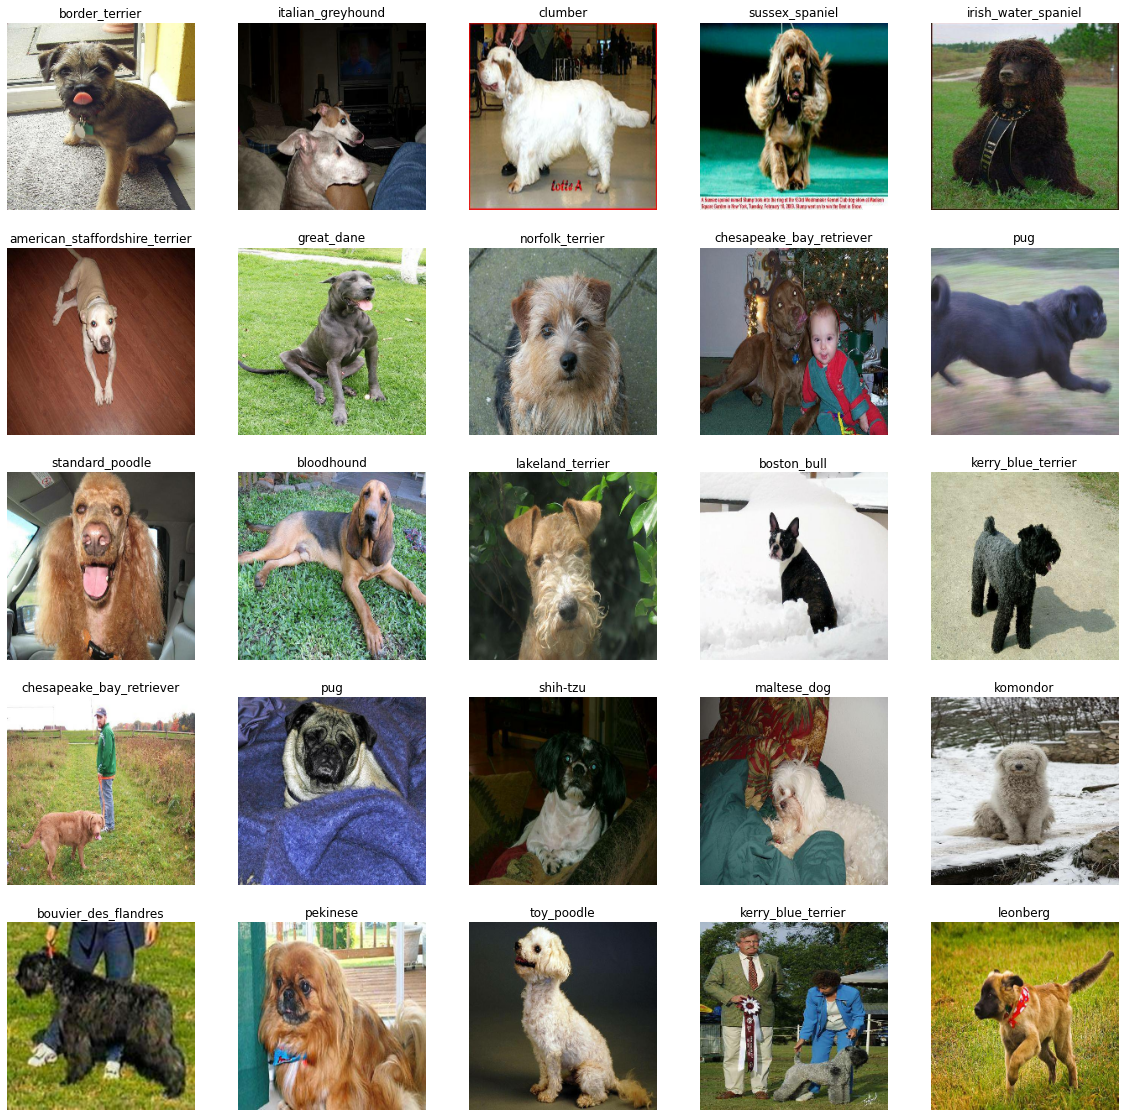

In [ ]:
# Visualize training images from the training data batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_images(train_images, train_labels)

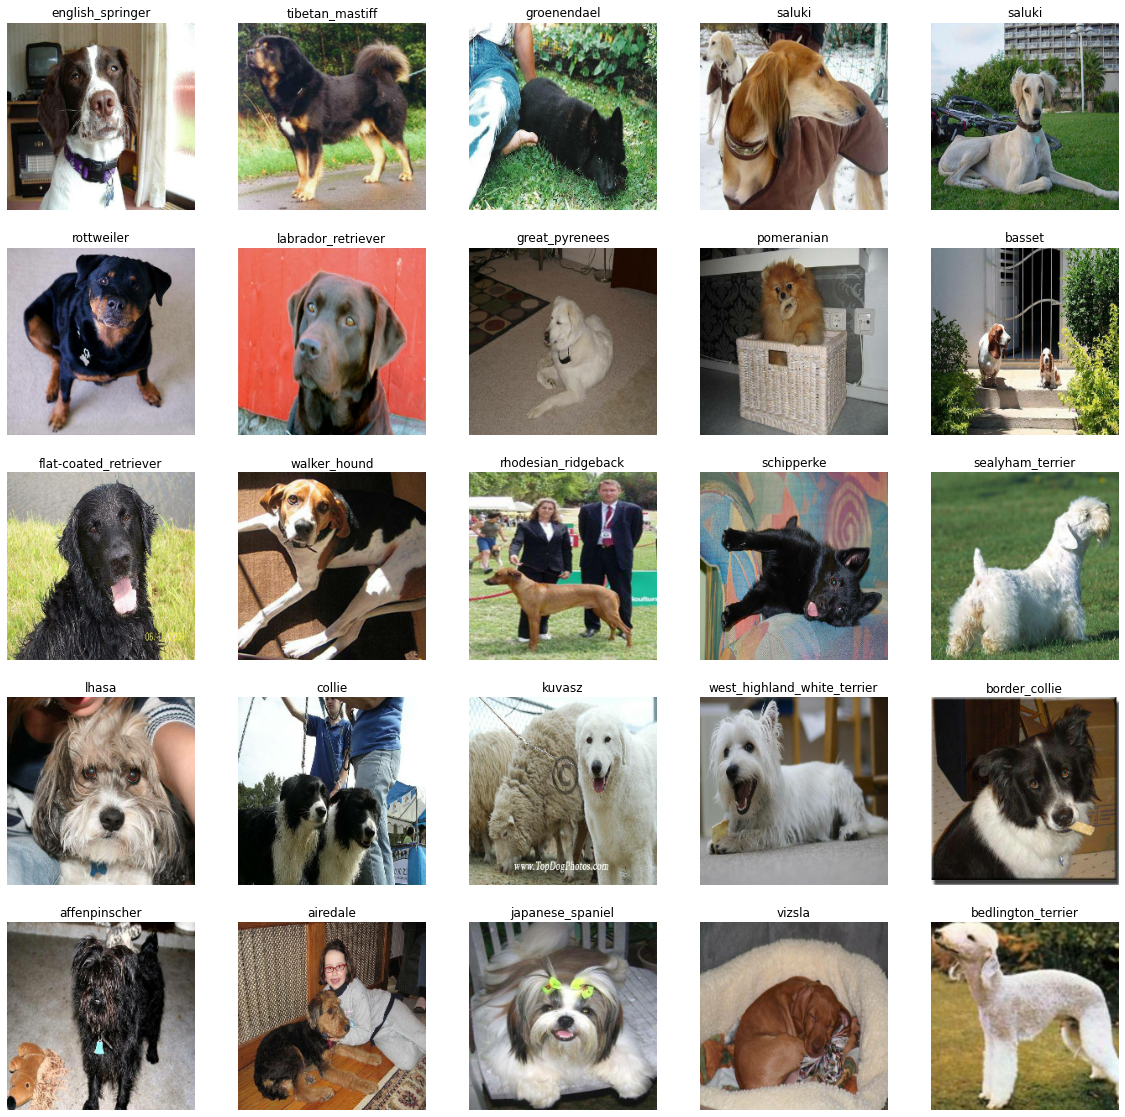

In [ ]:
# Visualize validation images from the validation data batch
val_images, val_labels = next(val_data.as_numpy_iterator())
show_images(val_images, val_labels)

In [ ]:
# Setup input shape
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

In [ ]:
# Create a function which builds a CNN model
def modelling(input_shape=INPUT_SHAPE):

  CNN_model = Sequential()
  CNN_model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                  activation ='relu', input_shape = (IMG_SIZE, IMG_SIZE, 1)))
  CNN_model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                  activation ='relu'))
  CNN_model.add(MaxPool2D(pool_size=(2,2)))
  CNN_model.add(Dropout(0.15))


  CNN_model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                  activation ='relu'))
  CNN_model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                  activation ='relu'))
  CNN_model.add(MaxPool2D(pool_size=(2,2)))
  CNN_model.add(Dropout(0.15))

  CNN_model.compile(optimizer=Adam(lr=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

  CNN_model.summary()

  # Build the model
  model.build(INPUT_SHAPE) 
  
  return model

In [ ]:
# Create a model and check its details
created_model = modelling()
created_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 224, 224, 32)      832       
                                                                 
 conv2d_9 (Conv2D)           (None, 224, 224, 32)      25632     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 112, 112, 32)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 112, 112, 64)      36928     
                                                      

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


NameError: ignored

In [ ]:
# Create early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3) # stops after 3 rounds of no improvements

In [ ]:
# Number of times our model passes through the data
EPOCHS = 100 

In [ ]:
# Build a function to train and return a trained model
def train_model():
    
  # Create a model
  model = modelling()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=EPOCHS,
            validation_data=val_data,
            validation_freq=1, # check validation metrics every epoch
            callbacks=[early_stopping])
  
  return model

In [ ]:
# Fit the model to the data
model = train_model()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 224, 224, 32)      832       
                                                                 
 conv2d_33 (Conv2D)          (None, 224, 224, 32)      25632     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 112, 112, 32)      0         
                                                                 
 conv2d_34 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 conv2d_35 (Conv2D)          (None, 112, 112, 64)      36928     
                                                     

In [ ]:
# Make predictions on the validation data
predictions = model.predict(val_data, verbose=1) # verbose shows us how long there is to go
predictions

19/19 [==============================] - 3s 141ms/step


array([[1.7766968e-06, 5.8076108e-07, 4.6817181e-08, ..., 3.3908853e-07,
        2.9537703e-06, 5.8620367e-07],
       [1.0454639e-05, 1.1113394e-04, 1.4151871e-07, ..., 8.3067235e-08,
        2.4352555e-06, 5.8191678e-09],
       [2.0037674e-04, 1.3754288e-03, 3.4737019e-05, ..., 4.7641392e-05,
        2.3185623e-06, 4.2539014e-07],
       ...,
       [7.2987075e-03, 1.1863563e-02, 4.7267161e-04, ..., 2.6050584e-02,
        5.2133226e-03, 4.7058442e-05],
       [6.8404029e-07, 1.9767649e-06, 1.8999017e-08, ..., 2.3547448e-06,
        3.0154863e-04, 1.0041335e-06],
       [1.7126875e-04, 2.2749091e-06, 8.8956654e-07, ..., 1.0478144e-03,
        3.0159890e-05, 3.1428042e-06]], dtype=float32)

In [ ]:
predictions.shape

(600, 120)

In [ ]:
# First prediction
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(predictions[0])}")
print(f"Max index: {np.argmax(predictions[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {unique[np.argmax(predictions[0])]}") # the predicted label

[1.77669676e-06 5.80761082e-07 4.68171812e-08 1.98273568e-07
 5.44969807e-05 1.54461639e-04 3.33287282e-08 2.32122416e-04
 3.16982755e-06 8.07734614e-05 1.71139686e-06 5.33622938e-07
 2.59806740e-07 6.88284445e-07 1.68086061e-07 4.23136316e-06
 9.68167933e-06 5.77985475e-06 3.51950547e-07 2.60676916e-05
 2.19921588e-07 4.37112567e-06 3.80225522e-08 1.04241717e-08
 4.24192511e-02 1.67170199e-07 4.59580235e-07 2.68829717e-06
 8.02232171e-06 1.67096653e-06 6.30473593e-08 5.64704123e-06
 1.06923135e-05 2.57137344e-06 3.59113528e-06 4.20194901e-09
 8.71903367e-08 1.09559416e-07 2.21792470e-06 7.94340576e-06
 9.55911491e-06 9.46481645e-01 1.10551055e-05 2.29156978e-08
 1.28478336e-03 3.57534077e-06 2.87841466e-08 8.16407334e-03
 2.44726863e-07 2.02096544e-06 7.63700427e-07 3.90482091e-05
 1.31965032e-06 3.80755315e-04 1.29130706e-09 4.06018153e-05
 1.47936603e-07 6.17627677e-07 4.67367499e-06 2.07035578e-06
 2.36583014e-06 6.90757270e-06 4.29130694e-07 4.93422194e-05
 2.26547840e-07 2.976759

In [ ]:
def pred_label(prediction_probabilities):

  return unique[np.argmax(prediction_probabilities)]

prediction_label = pred_label(predictions[0])
prediction_label

'english_springer'

In [ ]:
# function to unbatch a batched dataset
def unbatchify(data):
  
  images = []
  labels = []

  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.41326207, 0.41718364, 0.3544385 ],
         [0.36937293, 0.3732945 , 0.31054938],
         [0.38238448, 0.38630605, 0.32356092],
         ...,
         [0.85572916, 0.8988664 , 0.9216594 ],
         [0.81720906, 0.8603463 , 0.8760326 ],
         [0.87009096, 0.9132282 , 0.9289145 ]],
 
        [[0.41238695, 0.41630852, 0.3535634 ],
         [0.40000004, 0.4039216 , 0.34117648],
         [0.40333864, 0.4072602 , 0.3445151 ],
         ...,
         [0.96608555, 0.9984034 , 0.9996638 ],
         [0.937802  , 0.98093927, 0.99544823],
         [0.9232422 , 0.95921254, 0.96534306]],
 
        [[0.41683942, 0.420761  , 0.35801587],
         [0.39275387, 0.39667544, 0.3339303 ],
         [0.4052726 , 0.40919417, 0.34644905],
         ...,
         [0.93628675, 0.9760188 , 0.98673296],
         [0.788624  , 0.8290739 , 0.8393855 ],
         [0.8861353 , 0.92658526, 0.93689686]],
 
        ...,
 
        [[0.3655635 , 0.25968117, 0.2322302 ],
         [0.38517138, 0.279289  , 0.25183

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n):
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
  # Get the pred label
  prediction_label = pred_label(pred_prob)
  
  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if prediction_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(prediction_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

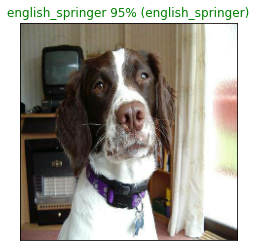

In [ ]:
# example prediction, original image and truth label
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=0)

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n):
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  prediction_label = pred_label(pred_prob)

  # Find the top 7 prediction confidence indexes
  pred_indexes_7 = pred_prob.argsort()[-7:][::-1]
    
  # Find the top 7 prediction confidence values
  pred_values_7 = pred_prob[pred_indexes_7]
    
  # Find the top 7 prediction labels
  pred_labels_7 = unique[pred_indexes_7]

  # Setup plot
  top_plot = plt.bar(np.arange(len(pred_labels_7)), 
                     pred_values_7, 
                     color="purple")
  plt.xticks(np.arange(len(pred_labels_7)),
             labels=pred_labels_7,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, pred_labels_7):
    top_plot[np.argmax(pred_labels_7 == true_label)].set_color("orange")
  else:
    pass

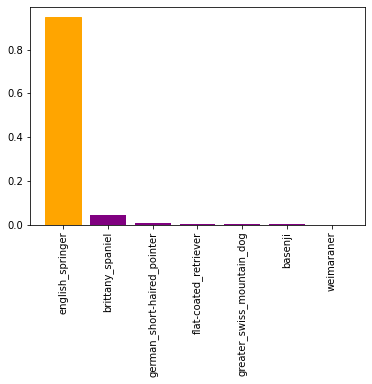

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=0)

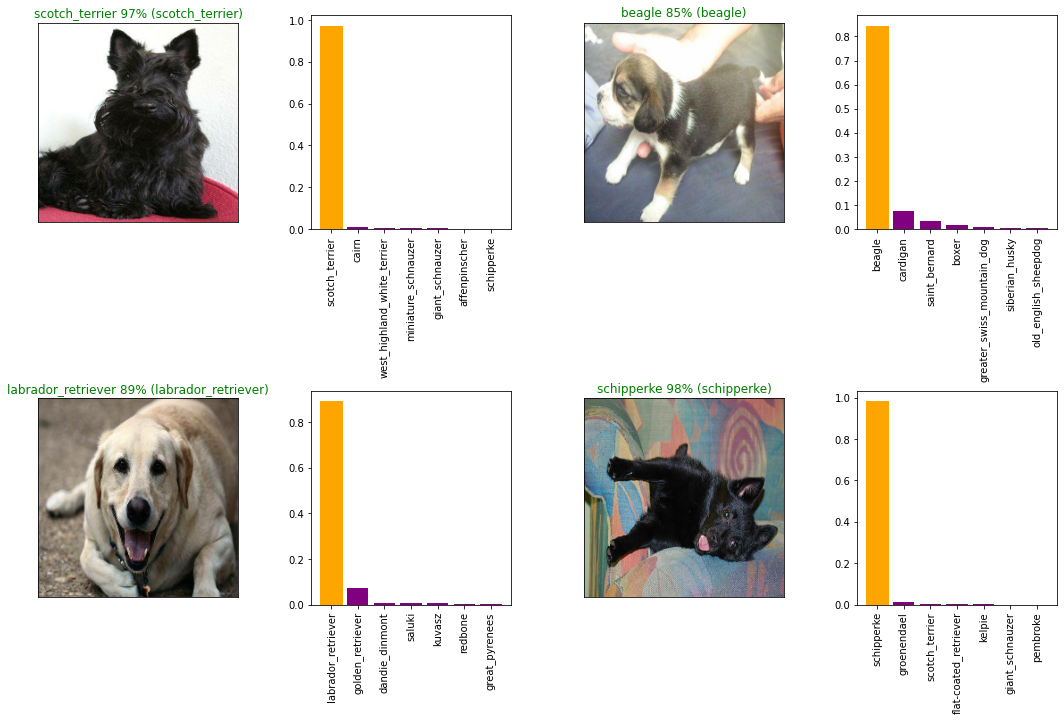

In [ ]:
# few predictions and their different values
rows = 2
cols = 2
num_images = rows*cols
plt.figure(figsize=(5*1.5*cols, 5*rows))
for i in range(num_images):
  n = r.randint(1,199)
  plt.subplot(rows, 2*cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n = n)
  plt.subplot(rows, 2*cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n = n)
plt.tight_layout(h_pad=1.0)
plt.show()